## Question 1 : MDP Deterministic Policy Bellman Equations

For a deterministic policy we get :
 - Value function in terms of Action-Value Function : $V^{\pi_D}(s) = Q^{\pi_D}(s, \pi_D(s))$
 - Action Value Function in terms of Value function : $Q^{\pi_D}(s, \pi_D(s)) = R(s,\pi_D(s)) + \gamma*\sum P(s,\pi_D(s),s').V^{\pi_D}(s')$
 
 - Value function recurrence : $V^{\pi_D}(s) = R(s,\pi_D(s)) + \gamma.\sum P(s,\pi_D(s),s').V^{\pi_D}(s')$
 
 - Action Value function recurrence : $Q^{\pi_D}(s, \pi_D(s)) = R(s,\pi_D(s)) + \gamma.\sum P(s,\pi_D(s),s').Q^{\pi_D}(s',\pi_D(s'))$

## Question 2 : Optimal Value function and Policy

ok

## Question 3 : Frog lilypads

 - State Space $S = \{0,1,...,n\}$
 - Action Space $\mathbb{A} = \{A,B\}$
 - Transisiton functions : 
     - $P(i,A,i') = i/n$ if i' = i-1, $(n-i)/n$ if i' = i+1, $0$ otherwise
     - $P(i,B,i') = 1/n , \forall i' \in \{0,1,...,n\}$
 - Reward function : 1 for a transition to the state n and 0 otherwise

In [8]:
import os
os.chdir('/Users/Alex/Desktop/Documents_4A/Winter_quarter_1/MS&E_346/RL_book/')

In [9]:
from rl.markov_process import *
from rl.markov_decision_process import *
from typing import Mapping
from rl.distribution import Distribution, FiniteDistribution

In [10]:
from dataclasses import dataclass
from typing import Mapping, Dict
from rl.distribution import Categorical, FiniteDistribution


@dataclass(frozen = True)
class Lilypad: #Number of the lilypad
    case_number: int
    def position(self) -> int:
        return self.case_number

#Croak A = 0, Croak B = 1

In [108]:
#General parameter n
n=9
class PondMDPF(FiniteMarkovDecisionProcess[LilyPad, int]):
    def __init__(
        self,
        my_pos : int,
        rew : float): #The reward is the number of throw
        self.my_pos :int = my_pos
        self.rew :float = rew
        super().__init__(self.get_action_transition_reward_map())
        
    def get_action_transition_reward_map(self) -> \
            Mapping[Lilypad, Mapping[int, Categorical[Tuple[Lilypad,float]]]]:
        d : Dict[Lilypad, Dict[int, Categorical[Tuple[Lilypad,self.rew]]]] = {}
        #Terminal State 0
        #States 1 to n-2
        for i in range(1,n-1):
            d1: Dict[int, Categorical[Tuple[Lilypad, float]]] = {}
            sr_probs_dict = {}
            sr_probs_dict[(Lilypad(i-1),0)] = i/n
            sr_probs_dict[(Lilypad(i+1),0)] = (n-i)/n
            d1[0] = Categorical(sr_probs_dict)
            sr_probs_dict = {(Lilypad(j),0) : 1/n for j in range(n)}
            sr_probs_dict[(Lilypad(n),1)] = 1/n
            d1[1] = Categorical(sr_probs_dict)
            d[Lilypad(i)] = d1
        #Special case for n-1
        d1: Dict[int, Categorical[Tuple[Lilypad, float]]] = {}
        sr_probs_dict = {}
        sr_probs_dict[(Lilypad(n-2),0)] = (n-1)/n
        sr_probs_dict[(Lilypad(n),1)] = 1/n
        d1[0] = Categorical(sr_probs_dict)
        sr_probs_dict = {(Lilypad(j),0) : 1/n for j in range(n)}
        sr_probs_dict[(Lilypad(n),1)] = 1/n
        d1[1] = Categorical(sr_probs_dict)
        d[Lilypad(n-1)] = d1
        
        #Terminal state n        
        return d

In [109]:
my_pos = 3
rew = 0
lp_mdp = PondMDPF(my_pos,rew)
print(lp_mdp)

From State Lilypad(case_number=1):
  With Action 0:
    To [Terminal State Lilypad(case_number=0) and Reward 0.000] with Probability 0.111
    To [State Lilypad(case_number=2) and Reward 0.000] with Probability 0.889
  With Action 1:
    To [Terminal State Lilypad(case_number=0) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=1) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=2) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=3) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=4) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=5) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=6) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=7) and Reward 0.000] with Probability 0.100
    To [State Lilypad(case_number=8) and Reward 0.000] with Probability 0.100
    To [Terminal State Lilypad(case_number=9) and Rewar

In [110]:
#### Finite deterministic policy
from rl.policy import FiniteDeterministicPolicy

from itertools import product
x = [i for i in product(range(2), repeat=n-1)]
All_policies = np.array(x)

In [111]:
#Evaluate Value Function for each of the policies
for l in All_policies:
    fdp: FiniteDeterministicPolicy[Lilypad, int] = \
        FiniteDeterministicPolicy({Lilypad(i): l[i-1] for i in range(1,n)})
        
    implied_mrp: FiniteMarkovRewardProcess[Lilypad] = lp_mdp.apply_finite_policy(fdp)
    user_gamma = 1
    print(fdp)
    implied_mrp.display_value_function(gamma=user_gamma)
    print(' ')


For State Lilypad(case_number=1): Do Action 0
For State Lilypad(case_number=2): Do Action 0
For State Lilypad(case_number=3): Do Action 0
For State Lilypad(case_number=4): Do Action 0
For State Lilypad(case_number=5): Do Action 0
For State Lilypad(case_number=6): Do Action 0
For State Lilypad(case_number=7): Do Action 0
For State Lilypad(case_number=8): Do Action 0

{NonTerminal(state=Lilypad(case_number=8)): 0.578,
 NonTerminal(state=Lilypad(case_number=7)): 0.526,
 NonTerminal(state=Lilypad(case_number=1)): 0.422,
 NonTerminal(state=Lilypad(case_number=5)): 0.503,
 NonTerminal(state=Lilypad(case_number=6)): 0.511,
 NonTerminal(state=Lilypad(case_number=4)): 0.497,
 NonTerminal(state=Lilypad(case_number=2)): 0.474,
 NonTerminal(state=Lilypad(case_number=3)): 0.489}
 
For State Lilypad(case_number=1): Do Action 0
For State Lilypad(case_number=2): Do Action 0
For State Lilypad(case_number=3): Do Action 0
For State Lilypad(case_number=4): Do Action 0
For State Lilypad(case_number=5): Do 


{NonTerminal(state=Lilypad(case_number=6)): 0.531,
 NonTerminal(state=Lilypad(case_number=5)): 0.524,
 NonTerminal(state=Lilypad(case_number=8)): 0.596,
 NonTerminal(state=Lilypad(case_number=7)): 0.546,
 NonTerminal(state=Lilypad(case_number=3)): 0.518,
 NonTerminal(state=Lilypad(case_number=1)): 0.446,
 NonTerminal(state=Lilypad(case_number=2)): 0.502,
 NonTerminal(state=Lilypad(case_number=4)): 0.518}
 
For State Lilypad(case_number=1): Do Action 0
For State Lilypad(case_number=2): Do Action 0
For State Lilypad(case_number=3): Do Action 1
For State Lilypad(case_number=4): Do Action 1
For State Lilypad(case_number=5): Do Action 0
For State Lilypad(case_number=6): Do Action 0
For State Lilypad(case_number=7): Do Action 0
For State Lilypad(case_number=8): Do Action 1

{NonTerminal(state=Lilypad(case_number=4)): 0.461,
 NonTerminal(state=Lilypad(case_number=7)): 0.461,
 NonTerminal(state=Lilypad(case_number=5)): 0.461,
 NonTerminal(state=Lilypad(case_number=6)): 0.461,
 NonTerminal(sta

 NonTerminal(state=Lilypad(case_number=7)): 0.474,
 NonTerminal(state=Lilypad(case_number=6)): 0.474,
 NonTerminal(state=Lilypad(case_number=8)): 0.474,
 NonTerminal(state=Lilypad(case_number=3)): 0.474,
 NonTerminal(state=Lilypad(case_number=5)): 0.474,
 NonTerminal(state=Lilypad(case_number=4)): 0.474}
 
For State Lilypad(case_number=1): Do Action 0
For State Lilypad(case_number=2): Do Action 1
For State Lilypad(case_number=3): Do Action 1
For State Lilypad(case_number=4): Do Action 0
For State Lilypad(case_number=5): Do Action 0
For State Lilypad(case_number=6): Do Action 1
For State Lilypad(case_number=7): Do Action 0
For State Lilypad(case_number=8): Do Action 0

{NonTerminal(state=Lilypad(case_number=8)): 0.58,
 NonTerminal(state=Lilypad(case_number=1)): 0.456,
 NonTerminal(state=Lilypad(case_number=2)): 0.513,
 NonTerminal(state=Lilypad(case_number=3)): 0.513,
 NonTerminal(state=Lilypad(case_number=5)): 0.513,
 NonTerminal(state=Lilypad(case_number=4)): 0.513,
 NonTerminal(state

 
For State Lilypad(case_number=1): Do Action 1
For State Lilypad(case_number=2): Do Action 0
For State Lilypad(case_number=3): Do Action 0
For State Lilypad(case_number=4): Do Action 1
For State Lilypad(case_number=5): Do Action 1
For State Lilypad(case_number=6): Do Action 0
For State Lilypad(case_number=7): Do Action 0
For State Lilypad(case_number=8): Do Action 0

{NonTerminal(state=Lilypad(case_number=6)): 0.555,
 NonTerminal(state=Lilypad(case_number=8)): 0.616,
 NonTerminal(state=Lilypad(case_number=7)): 0.568,
 NonTerminal(state=Lilypad(case_number=4)): 0.548,
 NonTerminal(state=Lilypad(case_number=5)): 0.548,
 NonTerminal(state=Lilypad(case_number=3)): 0.548,
 NonTerminal(state=Lilypad(case_number=1)): 0.548,
 NonTerminal(state=Lilypad(case_number=2)): 0.548}
 
For State Lilypad(case_number=1): Do Action 1
For State Lilypad(case_number=2): Do Action 0
For State Lilypad(case_number=3): Do Action 0
For State Lilypad(case_number=4): Do Action 1
For State Lilypad(case_number=5): D

 NonTerminal(state=Lilypad(case_number=5)): 0.5}
 
For State Lilypad(case_number=1): Do Action 1
For State Lilypad(case_number=2): Do Action 1
For State Lilypad(case_number=3): Do Action 0
For State Lilypad(case_number=4): Do Action 0
For State Lilypad(case_number=5): Do Action 0
For State Lilypad(case_number=6): Do Action 0
For State Lilypad(case_number=7): Do Action 0
For State Lilypad(case_number=8): Do Action 0

{NonTerminal(state=Lilypad(case_number=8)): 0.678,
 NonTerminal(state=Lilypad(case_number=7)): 0.638,
 NonTerminal(state=Lilypad(case_number=1)): 0.598,
 NonTerminal(state=Lilypad(case_number=2)): 0.598,
 NonTerminal(state=Lilypad(case_number=5)): 0.62,
 NonTerminal(state=Lilypad(case_number=3)): 0.61,
 NonTerminal(state=Lilypad(case_number=4)): 0.616,
 NonTerminal(state=Lilypad(case_number=6)): 0.626}
 
For State Lilypad(case_number=1): Do Action 1
For State Lilypad(case_number=2): Do Action 1
For State Lilypad(case_number=3): Do Action 0
For State Lilypad(case_number=4): 

 NonTerminal(state=Lilypad(case_number=2)): 0.526}
 
For State Lilypad(case_number=1): Do Action 1
For State Lilypad(case_number=2): Do Action 1
For State Lilypad(case_number=3): Do Action 1
For State Lilypad(case_number=4): Do Action 0
For State Lilypad(case_number=5): Do Action 0
For State Lilypad(case_number=6): Do Action 1
For State Lilypad(case_number=7): Do Action 1
For State Lilypad(case_number=8): Do Action 1

{NonTerminal(state=Lilypad(case_number=2)): 0.5,
 NonTerminal(state=Lilypad(case_number=5)): 0.5,
 NonTerminal(state=Lilypad(case_number=4)): 0.5,
 NonTerminal(state=Lilypad(case_number=6)): 0.5,
 NonTerminal(state=Lilypad(case_number=3)): 0.5,
 NonTerminal(state=Lilypad(case_number=8)): 0.5,
 NonTerminal(state=Lilypad(case_number=7)): 0.5,
 NonTerminal(state=Lilypad(case_number=1)): 0.5}
 
For State Lilypad(case_number=1): Do Action 1
For State Lilypad(case_number=2): Do Action 1
For State Lilypad(case_number=3): Do Action 1
For State Lilypad(case_number=4): Do Action 0


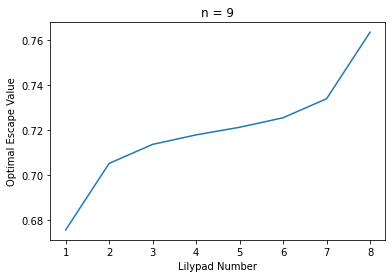

In [112]:
#####Plot graph of the Optimal Value function and Croak for each state...
# Optimal deterministic policy : Croak B for state 1, Croak A for the other states
import matplotlib.pyplot as plt

opt_fdp: FiniteDeterministicPolicy[Lilypad, int] = FiniteDeterministicPolicy({Lilypad(i): 1 if i==1 else 0 for i in range(1,n)})

implied_mrp: FiniteMarkovRewardProcess[Lilypad] = lp_mdp.apply_finite_policy(opt_fdp)
user_gamma = 1

plt.plot(range(1,n),implied_mrp.get_value_function_vec(gamma=user_gamma))
plt.title('n = '+str(n))
plt.xlabel("Lilypad Number")
plt.ylabel("Optimal Escape Value")
plt.show()

In [114]:
from rl.dynamic_programming import evaluate_mrp_result
from rl.dynamic_programming import policy_iteration_result
from rl.dynamic_programming import value_iteration_result

print("Implied MRP Policy Evaluation Value Function")
print("--------------")
print(evaluate_mrp_result(implied_mrp, gamma=user_gamma))
print()

print("MDP Policy Iteration Optimal Value Function and Optimal Policy")
print("--------------")
opt_vf_pi, opt_policy_pi = policy_iteration_result(
    lp_mdp,
    gamma=user_gamma
)
pprint(opt_vf_pi)
print(opt_policy_pi)
print()

print("MDP Value Iteration Optimal Value Function and Optimal Policy")
print("--------------")
opt_vf_vi, opt_policy_vi = value_iteration_result(lp_mdp, gamma=user_gamma)
pprint(opt_vf_vi)
print(opt_policy_vi)
print()

Implied MRP Policy Evaluation Value Function
--------------
{NonTerminal(state=Lilypad(case_number=1)): 0.6740814292644601, NonTerminal(state=Lilypad(case_number=2)): 0.7032602272032744, NonTerminal(state=Lilypad(case_number=3)): 0.7116089210593635, NonTerminal(state=Lilypad(case_number=4)): 0.715797827485104, NonTerminal(state=Lilypad(case_number=5)): 0.7191667113910938, NonTerminal(state=Lilypad(case_number=6)): 0.7234001143078606, NonTerminal(state=Lilypad(case_number=7)): 0.7318965049601475, NonTerminal(state=Lilypad(case_number=8)): 0.7616771859758691}

MDP Policy Iteration Optimal Value Function and Optimal Policy
--------------
{NonTerminal(state=Lilypad(case_number=3)): 0.7116089210593635,
 NonTerminal(state=Lilypad(case_number=2)): 0.7032602272032744,
 NonTerminal(state=Lilypad(case_number=7)): 0.7318965049601475,
 NonTerminal(state=Lilypad(case_number=5)): 0.7191667113910938,
 NonTerminal(state=Lilypad(case_number=6)): 0.7234001143078606,
 NonTerminal(state=Lilypad(case_numbe

In [116]:
value_iteration_result(lp_mdp,gamma=1)

({NonTerminal(state=Lilypad(case_number=1)): 0.6740759906866916,
  NonTerminal(state=Lilypad(case_number=2)): 0.7032534854815226,
  NonTerminal(state=Lilypad(case_number=3)): 0.7116018474803572,
  NonTerminal(state=Lilypad(case_number=4)): 0.715790637800369,
  NonTerminal(state=Lilypad(case_number=5)): 0.7191594892030078,
  NonTerminal(state=Lilypad(case_number=6)): 0.7233929278171312,
  NonTerminal(state=Lilypad(case_number=7)): 0.7318894904382893,
  NonTerminal(state=Lilypad(case_number=8)): 0.7616709216244697},
 For State Lilypad(case_number=1): Do Action 1
 For State Lilypad(case_number=2): Do Action 0
 For State Lilypad(case_number=3): Do Action 0
 For State Lilypad(case_number=4): Do Action 0
 For State Lilypad(case_number=5): Do Action 0
 For State Lilypad(case_number=6): Do Action 0
 For State Lilypad(case_number=7): Do Action 0
 For State Lilypad(case_number=8): Do Action 0)

## Question 4

ok